In [195]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service 
from bs4 import BeautifulSoup

import pandas as pd
import numpy as np

import folium
import json

In [196]:
ser = Service('../chromedriver/chromedriver.exe')
driver = webdriver.Chrome(service = ser)

url = 'http://search.danawa.com/dsearch.php?k1=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0'
driver.get(url)

In [197]:
html = driver.page_source
soup = BeautifulSoup(html, 'html.parser')

In [198]:
prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item ')
len(prod_items)

# prod_items[0].select('a.click_log_product_standard_title_')[0].text

44

In [199]:
# prod_items[0].select('a.click_log_product_standard_title_')[0].text
title = prod_items[0].select('p.prod_name > a')[0].text
spec_list = prod_items[0].select('div.spec_list')[0].text.strip()
price = prod_items[0].select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(',','')
print(title, spec_list, price, sep = '   ||  ')

LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571   ||  핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm   ||  1057840


In [200]:
prod_data = []

for prod_item in prod_items:
#    if i in prod_items[0]:
        
        try: 
            title = prod_item.select('p.prod_name > a')[0].text
        except:
            title = ""
        
        try:
            spec_list = prod_item.select('div.spec_list')[0].text.strip()
        except:
            spec_list = ""
            
        try:
            price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(',','')
        except:
            price = 0
            
        mylist = [title, spec_list, price]
        
        prod_data.append(mylist)
            
prod_data

[['LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm',
  '1057840'],
 ['삼성전자 비스포크 제트 VS20A956A3',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm',
  '571180'],
 ['LG전자 코드제로 ThinQ A9S AS9370IKT',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 솔형 / 틈새 / 올인원타워 / 

In [201]:
len(prod_data)

44

In [202]:
def get_prod_items(prod_items):
    prod_data = []

    for prod_item in prod_items:
        
        try: 
            title = prod_item.select('p.prod_name > a')[0].text
        except:
            title = ""
        
        try:
            spec_list = prod_item.select('div.spec_list')[0].text.strip()
        except:
            spec_list = ""
            
        try:
            price = prod_item.select('li.rank_one > p.price_sect > a > strong')[0].text.strip().replace(',','')
        except:
            price = 0
            
        mylist = [title, spec_list, price]
        
        prod_data.append(mylist)
        
    return(prod_data)

In [203]:
prod_data = get_prod_items(prod_items)
len(prod_data)

44

In [204]:
prod_data[:4]

[['LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (2개) / 리튬이온 / [필터] 분리형배기필터 / 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 침구 / 솔형 / 틈새 / 올인원타워 / [부가] 색상: 카밍베이지 / 무게: 2.6kg / 크기(가로x세로x깊이): 250x1120x260mm',
  '1057840'],
 ['삼성전자 비스포크 제트 VS20A956A3',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: 210W / 제트싸이클론 / 디지털인버터모터 / [배터리] 충전시간: 3시간30분 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 5단계여과 / [기능] 자동물공급 / 디스플레이표시창 / 배터리잔량표시 / 자동먼지비움 / [구성] 바닥 / 솔형 / 틈새 / 연장툴 / 청정스테이션 / [부가] 먼지통용량: 0.5L / 색상: 미스티화이트 / 무게: 2.5kg / 액세서리크래들  / 크기(가로x세로x깊이): 250x930x202mm',
  '571180'],
 ['LG전자 코드제로 ThinQ A9S AS9370IKT',
  '핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W / [성능] 흡입력: 210W / 2중터보싸이클론 / 스마트인버터모터 / [배터리] 충전시간: 4시간 / 사용시간(개당): 1시간 / 분리형 (1개) / 리튬이온 / [필터] 헤파필터 / H13급 / 5단계여과 / [기능] 자동물공급 / 배터리잔량표시 / IoT기능 / 자동먼지비움 / [구성] 바닥 / 물걸레 / 솔형 / 틈새 / 올인원타워 / 

In [ ]:
http://search.danawa.com/dsearch.php?query=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&originalQuery=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&volumeType=allvs&page=1&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390042&tab=goods
http://search.danawa.com/dsearch.php?query=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&originalQuery=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&volumeType=allvs&page=2&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390042&tab=goods
http://search.danawa.com/dsearch.php?query=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&originalQuery=%EB%AC%B4%EC%84%A0%EC%B2%AD%EC%86%8C%EA%B8%B0&volumeType=allvs&page=3&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390042&tab=goods

In [206]:
def get_search_page_url(keyword, page):
    url = 'http://search.danawa.com/dsearch.php?query={}&originalQuery={}&volumeType=allvs&page={}&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390042&tab=goods'.format(keyword, keyword, page)
    return(url)

In [207]:
url = get_search_page_url('무선청소기', '1')
print(url)

http://search.danawa.com/dsearch.php?query=무선청소기&originalQuery=무선청소기&volumeType=allvs&page=1&limit=40&sort=saveDESC&list=list&boost=true&addDelivery=N&recommendedSort=Y&defaultUICategoryCode=102207&defaultPhysicsCategoryCode=72%7C80%7C81%7C0&defaultVmTab=2606&defaultVaTab=390042&tab=goods


In [208]:
import time
from tqdm import tqdm_notebook

In [209]:
keyword = '무선청소기'
total_page = 10
prod_data_total = []

for page in tqdm_notebook(range(1, total_page+1)):
    url = get_search_page_url(keyword, page)
    driver.get(url)
    
    time.sleep(5)
    
    html = driver.page_source
    soup = BeautifulSoup(html, 'html.parser')
    
    prod_items = soup.select('div.main_prodlist > ul.product_list > li.prod_item ')
    prod_items_list = get_prod_items(prod_items)
    
    # prod_data_total.append(prod_items_list)
    
    prod_data_total = prod_data_total + prod_items_list
    

C:\Users\Public\Documents\ESTsoft\CreatorTemp/ipykernel_12616/3714136084.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for page in tqdm_notebook(range(1, total_page+1)):


  0%|          | 0/10 [00:00<?, ?it/s]

In [211]:
len(prod_data_total)
# prod_items_list

440

In [212]:
data = pd.DataFrame(prod_data_total)
data.columns = ['상품명', '스펙 목록', '가격']

data.to_excel('./files/1_danawa_crawling_result_class.xlsx', index = False)

In [213]:
data.head()

,상품명,스펙 목록,가격
0,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...,1057840
1,삼성전자 비스포크 제트 VS20A956A3,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: ...,571180
2,LG전자 코드제로 ThinQ A9S AS9370IKT,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...,794020
3,TcKh36guTP,TcKh36guTP380836,380836
4,샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",60590


In [214]:
data.replace("", np.nan, inplace = True)
data.dropna(inplace = True)

data.head()

,상품명,스펙 목록,가격
0,LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...,1057840
1,삼성전자 비스포크 제트 VS20A956A3,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / [성능] 흡입력: ...,571180
2,LG전자 코드제로 ThinQ A9S AS9370IKT,핸디/스틱청소기 / 핸디+스틱형 / 무선형 / 흡입+걸레겸용 / 소비전력: 590W...,794020
3,TcKh36guTP,TcKh36guTP380836,380836
4,샤오미 CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),"차량용청소기 / 무선 / 흡입력: 16,800Pa / 최대출력: 120W / 헤파필...",60590


In [215]:
print(data['상품명'][0].split(' ', 1)[0])
data['상품명'].str.split(' ', 1)

LG전자


0          [LG전자, 오브제컬렉션 코드제로 ThinQ A9S AO9571]
1                    [삼성전자, 비스포크 제트 VS20A956A3]
2              [LG전자, 코드제로 ThinQ A9S AS9370IKT]
3                                  [TcKh36guTP]
4      [샤오미, CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매)]
                         ...                   
435                     [테팔, 에어포스 라이트 TY6545KL]
436                       [스윙, 파워스윙 SWING-8000]
437                            [이나프, ILVH-1000]
438                   [일렉트로룩스, 퓨어 F9 PF91-5EBF]
439                              [오아, OA-CL010]
Name: 상품명, Length: 410, dtype: object

In [216]:
# datas = data['상품명']
title = "LG전자 오브제컬렉션 코드제로 ThinQ A9S AO9571"
info = title.split(' ', 1)
print(info)

['LG전자', '오브제컬렉션 코드제로 ThinQ A9S AO9571']


In [217]:
company_list = [] 
product_list = []

for title in data['상품명']:
    try: 
        title_info = title.split(' ', 1)
        company_name = title_info[0]
        product_name = title_info[1]
    
        company_list.append(company_name) 
        product_list.append(product_name)

    except:
        # pass
        company_list.append(None) 
        product_list.append(None)
        
print(company_list[:5])
print(product_list[:5])

['LG전자', '삼성전자', 'LG전자', None, '샤오미']
['오브제컬렉션 코드제로 ThinQ A9S AO9571', '비스포크 제트 VS20A956A3', '코드제로 ThinQ A9S AS9370IKT', None, 'CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매)']


In [218]:
spec_list = data['스펙 목록'][0].split(' / ')
category = spec_list[0].strip()
category

'핸디/스틱청소기'

In [219]:
spec_list = data['스펙 목록'][0].split(' / ')
category = spec_list[0].strip()

for spec in spec_list:
    if '사용시간' in spec:
        use_time_spec = spec
        
    elif '흡입력' in spec:
        suction_spec = spec
        
print(use_time_spec)
print(suction_spec)

use_time_value = use_time_spec.split(': ')[1].strip()
suction_spec_value = suction_spec.split(': ')[1].strip()
print(use_time_value)
print(suction_spec_value)

사용시간(개당): 1시간
[성능] 흡입력: 210W
1시간
210W


In [357]:
category_list = []
use_time_list = []
suction_list = []

for spec_data in data['스펙 목록']:
    spec_list = spec_data.split(' / ')
    
    category = spec_list[0].strip()
    category_list.append(category)
    
    for spec in spec_list:
        if '사용시간' in spec:
            use_time_spec = spec
        
        elif '흡입력' in spec:
            suction_spec = spec
        

    use_time_value = use_time_spec.split(': ')[1].strip()
    suction_spec_value = suction_spec.split(': ')[1].strip()
    
    use_time_list.append(use_time_value)
    suction_list.append(suction_spec_value)

In [358]:
print(category_list[:5])
print(use_time_list[:5])
print(suction_list[:5])

['핸디/스틱청소기', '핸디/스틱청소기', '핸디/스틱청소기', 'TcKh36guTP380836', '차량용청소기']
['1시간', '1시간', '1시간', '1시간', '30분']
['210W', '210W', '210W', '210W', '16,800Pa']


In [222]:
mytime = '1시간30분'
int(mytime.split('시간')[0])*60
# mytime.split('시간')[-1].replace('분','')
# mytime.split('시간')[-1].split('분')[0]

60

In [223]:
def convert_time_minute(time):
    
    try: 
            if '시간' in time:
                hour = time.split('시간')[0]
        
                if '분' in time:
                    minute = time.split('시간')[-1].replace('분','')
                else:
                    minute = 0
                
            else:
                hour =0
                minute = time.replace('분','')
                
            return int(hour)*60 + int(minute)
                
    except:
        return None
                

In [224]:
time = '1시간 40분'
convert_time_minute(time)

100

In [225]:
new_use_time_list = []

for time in use_time_list:
    value = convert_time_minute(time)
    new_use_time_list.append(value)
    
new_use_time_list[:10]

[60, 60, 60, 60, 30, 60, 60, 45, 60, 60]

In [226]:
suction_list[:10]

['210W',
 '210W',
 '210W',
 '210W',
 '16,800Pa',
 '210W',
 '20000Pa',
 '15,000Pa',
 '22000Pa',
 '210W']

In [227]:
mystring = suction_list[0].upper()
'16,800Pa'.upper().replace("PA", "")

'16,800'

In [228]:
def get_suction(value):
    try:
        value = value.upper()
        
        if "AW" in value or "W" in value:
            result = value.replace("A", "").replace("W", "").replace(",", "")
            result = int(result)
            
        elif "PA" in value:
            result = value.replace("PA", "").replace(",", "")
            result = int(result)/100
            
        else:
            result = None
        return result
        
        
    except:
        return None

In [229]:
new_suction_list = []
for power in suction_list:
    value = get_suction(power)
    new_suction_list.append(value)
    
new_suction_list

[210,
 210,
 210,
 210,
 168.0,
 210,
 200.0,
 150.0,
 220.0,
 210,
 210,
 210,
 151,
 140,
 210,
 210,
 130.0,
 80.0,
 220.0,
 200,
 55.0,
 130.0,
 130.0,
 240,
 290.0,
 100,
 100,
 100,
 140,
 270.0,
 250.0,
 250.0,
 65.0,
 168.0,
 None,
 250.0,
 210,
 210,
 200,
 210,
 140,
 70.0,
 210,
 210,
 210,
 210,
 210,
 210,
 150.0,
 150.0,
 150.0,
 150,
 240.0,
 150,
 150,
 210,
 210,
 210,
 260.0,
 220.0,
 220.0,
 155,
 210,
 210,
 210,
 210,
 150.0,
 48.0,
 48.0,
 210,
 220,
 210,
 210,
 100,
 130.0,
 185,
 210,
 60,
 240,
 200,
 200,
 200.0,
 200.0,
 35.0,
 120.0,
 120.0,
 100.0,
 100.0,
 150,
 150,
 50.0,
 50.0,
 150,
 None,
 None,
 None,
 210,
 210,
 210,
 210,
 210,
 210,
 150,
 50,
 200,
 35,
 35,
 80.0,
 40.0,
 40.0,
 270.0,
 270.0,
 270.0,
 270.0,
 30,
 15,
 210,
 210,
 210,
 210,
 210,
 210,
 150,
 50.0,
 50.0,
 210,
 150.0,
 150.0,
 150.0,
 58.0,
 200,
 80.0,
 130.0,
 130.0,
 130.0,
 130.0,
 110.0,
 120.0,
 150,
 230.0,
 None,
 200,
 220,
 220,
 210,
 210,
 50,
 100.0,
 100.0,
 2

In [230]:
pd_data = pd.DataFrame()
pd_data['카테고리'] = category_list
pd_data['회사명'] = company_list
pd_data['제품'] = product_list
pd_data['가격'] = data['가격'].astype(np.int32)
pd_data['사용시간'] = new_use_time_list
pd_data['흡입력'] = new_suction_list
pd_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1057840.0,60.0,210.0
1,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,571180.0,60.0,210.0
2,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,794020.0,60.0,210.0
3,TcKh36guTP380836,None,None,380836.0,60.0,210.0
4,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),60590.0,30.0,168.0


In [231]:
print(len(category_list))
print(len(company_list))
print(len(product_list))
print(len(new_use_time_list))
print(len(new_suction_list))

410
410
410
410
410


In [233]:
condition = pd_data['카테고리'] == '핸디/스틱청소기'

pd_data_final = pd_data[condition]
len(pd_data_final)

# pd_data_final['가격'] = pd_data_final['가격'].replace("", np.nan, inplace = True)
# pd_data_final['가격'] = pd_data_final['가격'].replace("", np.nan)
# data.replace("", np.nan, inplace = True)
pd_data_final.dropna(inplace= True)

pd_data_final.to_excel('./files/2_danawa_data_final_class.xlsx', index = False)

In [234]:
pd_data_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 0 to 409
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   카테고리    259 non-null    object 
 1   회사명     259 non-null    object 
 2   제품      259 non-null    object 
 3   가격      259 non-null    float64
 4   사용시간    259 non-null    float64
 5   흡입력     259 non-null    float64
dtypes: float64(3), object(3)
memory usage: 14.2+ KB


In [239]:
danawa_data = pd_data_final
danawa_data.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
0,핸디/스틱청소기,LG전자,오브제컬렉션 코드제로 ThinQ A9S AO9571,1057840.0,60.0,210.0
1,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A956A3,571180.0,60.0,210.0
2,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S AS9370IKT,794020.0,60.0,210.0
5,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957E3,804720.0,60.0,210.0
8,핸디/스틱청소기,샤오미,드리미 V10,49870.0,60.0,220.0


In [243]:
top_list = danawa_data.sort_values(['흡입력','사용시간'],ascending=False)
top_list.head()

,카테고리,회사명,제품,가격,사용시간,흡입력
221,핸디/스틱청소기,리하스,LH20,118710.0,120.0,330.0
313,핸디/스틱청소기,비브르,스톰파워 VE35,128000.0,50.0,310.0
202,핸디/스틱청소기,아이닉,NEW i20,340000.0,50.0,300.0
24,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,89000.0,48.0,290.0
345,핸디/스틱청소기,캐치웰,NEW F8,455380.0,25.0,290.0


In [244]:
price_mean_value = danawa_data['가격'].mean()
suction_mean_value = danawa_data['흡입력'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()
print("가격 평균값", price_mean_value)
print("흡입력 평균값", suction_mean_value)
print("사용시간 평균값", use_time_mean_value)

가격 평균값 294937.7104247104
흡입력 평균값 168.6061776061776
사용시간 평균값 43.43629343629344


In [245]:
condition_data = danawa_data [
    (danawa_data['가격'] <= price_mean_value) & 
    (danawa_data['흡입력'] >= suction_mean_value) & 
    (danawa_data['사용시간'] >= use_time_mean_value)]
condition_data

,카테고리,회사명,제품,가격,사용시간,흡입력
8,핸디/스틱청소기,샤오미,드리미 V10,49870.0,60.0,220.0
9,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957D2,155700.0,60.0,210.0
11,핸디/스틱청소기,LG전자,코드제로 ThinQ A9S A9370,124380.0,60.0,210.0
19,핸디/스틱청소기,삼성전자,제트 VS20T9210BF,40630.0,60.0,200.0
23,핸디/스틱청소기,다이슨,V15 디텍트 앱솔루트 엑스트라,38900.0,60.0,240.0
...,...,...,...,...,...,...
382,핸디/스틱청소기,원더스리빙,원더스 다이나킹 Z9,48420.0,65.0,220.0
389,핸디/스틱청소기,삼성전자,비스포크 제트 VS20A957G2P,129000.0,60.0,210.0
392,핸디/스틱청소기,DIBEA,X30,57930.0,50.0,250.0
397,핸디/스틱청소기,샤오미,드리미 V12 프로,109000.0,85.0,270.0


In [247]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import seaborn as sns
import platform 

rc('font', family = 'Malgun Gothic')

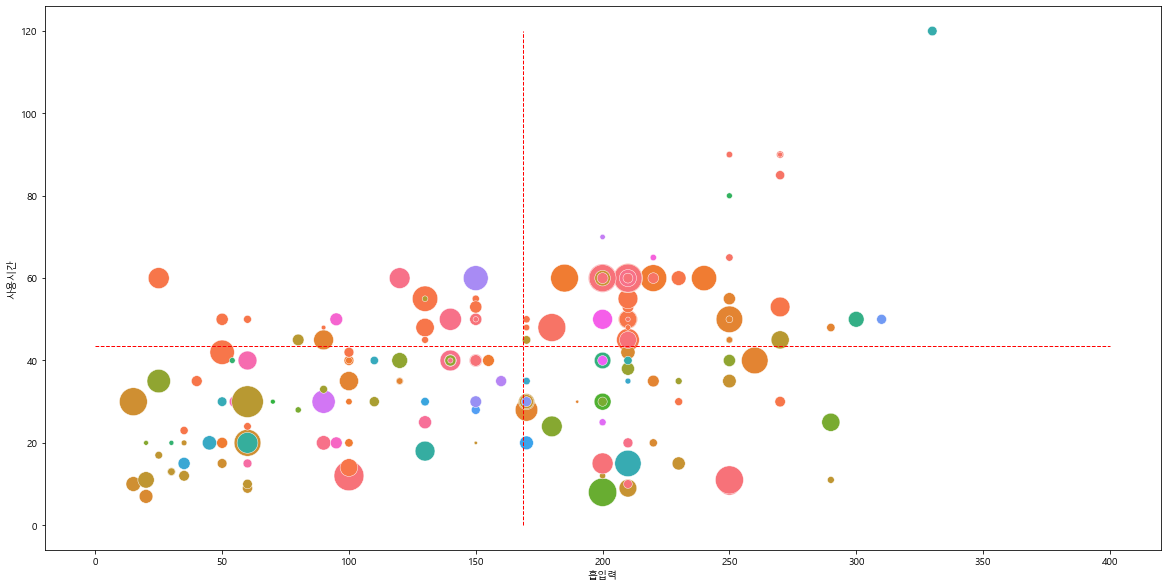

In [253]:
plt.figure(figsize = (20, 10))
sns.scatterplot(x = '흡입력', y = '사용시간',
               size = '가격', hue = danawa_data['회사명'],
               data = danawa_data, legend = False,
               sizes = (10, 1000))
plt.hlines(use_time_mean_value, 0, 400, color='red',
         linestyle='dashed', linewidth =1)
plt.vlines(suction_mean_value, 0, 120, color='red',
         linestyle='dashed', linewidth =1)

plt.show()

In [269]:
chart_data_selected = top_list[:20]
chart_data_selected 

,카테고리,회사명,제품,가격,사용시간,흡입력
221,핸디/스틱청소기,리하스,LH20,118710.0,120.0,330.0
313,핸디/스틱청소기,비브르,스톰파워 VE35,128000.0,50.0,310.0
202,핸디/스틱청소기,아이닉,NEW i20,340000.0,50.0,300.0
24,핸디/스틱청소기,DIBEA,차이슨 ALLNEW29000,89000.0,48.0,290.0
345,핸디/스틱청소기,캐치웰,NEW F8,455380.0,25.0,290.0
346,핸디/스틱청소기,블랙앤데커,PV1020,58080.0,11.0,290.0
29,핸디/스틱청소기,샤오미,드리미 V12,67430.0,90.0,270.0
110,핸디/스틱청소기,샤오미,드리미 T30,27000.0,90.0,270.0
397,핸디/스틱청소기,샤오미,드리미 V12 프로,109000.0,85.0,270.0
113,핸디/스틱청소기,일렉트로룩스,Well Q8 WQ81-3OMBF,535050.0,53.0,270.0


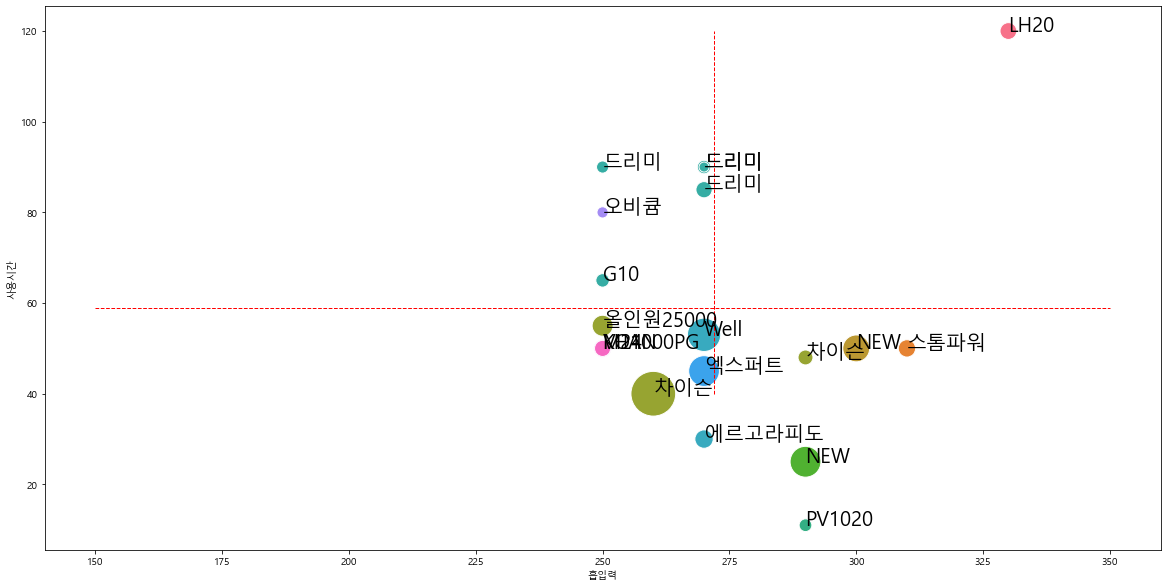

In [272]:
# suction_max_value = chart_data_selected['흡입력'].max()
suction_mean_value = chart_data_selected['흡입력'].mean()
# use_time_max_value = chart_data_selected['사용시간'].max()
use_time_mean_value = chart_data_selected['사용시간'].mean()

plt.figure(figsize = (20, 10))
sns.scatterplot(x = '흡입력', y = '사용시간',
               size = '가격', hue = chart_data_selected['회사명'],
               data = chart_data_selected, legend = False,
               sizes = (100, 2000))
plt.hlines(use_time_mean_value, 150, 350, color='red', 
           linestyle='dashed', linewidth=1)
plt.vlines(suction_mean_value, 40, 120, color='red', 
           linestyle='dashed', linewidth=1)

for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size=20)
    
    
plt.show()

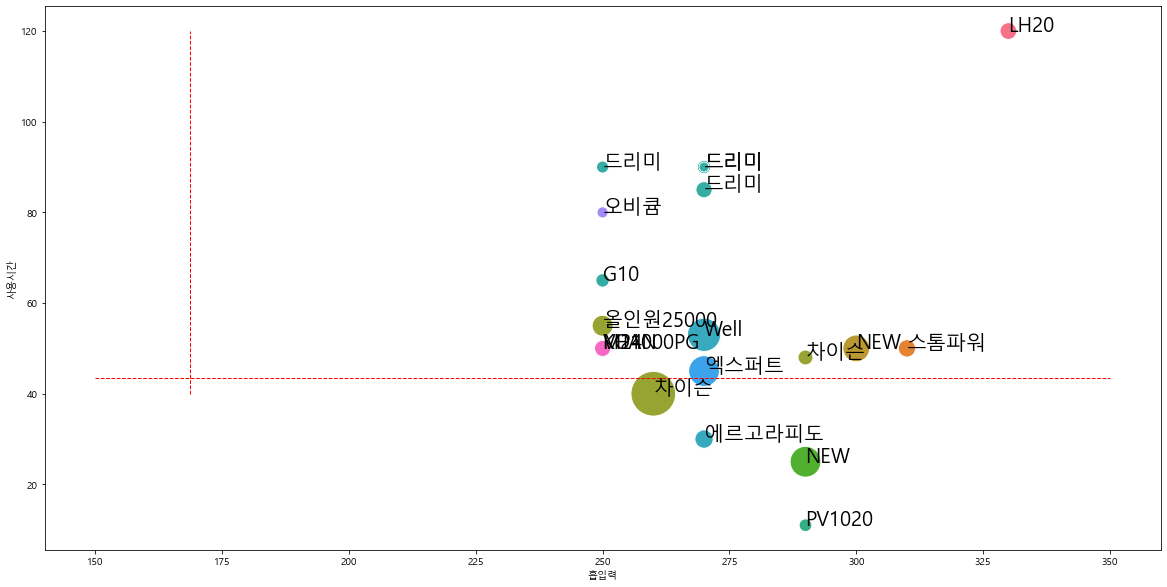

In [273]:
suction_mean_value = danawa_data['흡입력'].mean()
use_time_mean_value = danawa_data['사용시간'].mean()
# suction_mean_value = danawa_data['흡입력'].max()
# use_time_mean_value = danawa_data['사용시간'].max()

plt.figure(figsize = (20, 10))
sns.scatterplot(x = '흡입력', y = '사용시간',
               size = '가격', hue = chart_data_selected['회사명'],
               data = chart_data_selected, legend = False,
               sizes = (100, 2000))
plt.hlines(use_time_mean_value, 150, 350, color='red',
          linestyle='dashed', linewidth =1)
plt.vlines(suction_mean_value, 40, 120, color='red', 
           linestyle='dashed', linewidth=1)

for index, row in chart_data_selected.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['제품'].split(' ')[0]
    plt.text(x, y, s, size=20)

plt.show()

### 차량용 청소기 해보기

In [297]:
car = pd_data['카테고리'] == '차량용청소기'
carcleaner = pd_data[car]
carcleaner = carcleaner.reset_index(drop = True)
carcleaner

,카테고리,회사명,제품,가격,사용시간,흡입력
0,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),60590.0,30.0,168.0
1,차량용청소기,베이스어스,차량용 청소기 A3 (해외구매),73950.0,45.0,150.0
2,차량용청소기,샤오미,미지아 차량용 핸디 무선 청소기 (해외구매),887300.0,NaN,130.0
3,차량용청소기,위드앤올,2in1 휴대용 무선 에어건 핸디 청소기 WNA-AG8,673460.0,40.0,80.0
4,차량용청소기,조아스,차량용 에어건 청소기 JVC-2000,78830.0,20.0,55.0
5,차량용청소기,인트비즈,MORUN 차량용 무선 미니 청소기 V5,104990.0,NaN,130.0
6,차량용청소기,허밍,차량용 무선 에어건 프로 HME-C15000G,248000.0,NaN,100.0
7,차량용청소기,오아,클린보틀 차량용 청소기 OA-CL002,282060.0,20.0,65.0
8,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 3세대 (해외구매),194880.0,25.0,168.0
9,차량용청소기,샤오미,LYDSTO 핸디형 에어펌프 진공청소기,49000.0,25.0,NaN


In [310]:
len(carcleaner)

43

In [316]:
carcleaner.reset_index(drop = True)

,카테고리,회사명,제품,가격,사용시간,흡입력
0,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),60590.0,30.0,168.0
1,차량용청소기,베이스어스,차량용 청소기 A3 (해외구매),73950.0,45.0,150.0
2,차량용청소기,위드앤올,2in1 휴대용 무선 에어건 핸디 청소기 WNA-AG8,673460.0,40.0,80.0
3,차량용청소기,조아스,차량용 에어건 청소기 JVC-2000,78830.0,20.0,55.0
4,차량용청소기,오아,클린보틀 차량용 청소기 OA-CL002,282060.0,20.0,65.0
5,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 3세대 (해외구매),194880.0,25.0,168.0
6,차량용청소기,샤오미,SHUNZAO 차량용 무선청소기 2세대 Z1 (해외구매),542390.0,30.0,70.0
7,차량용청소기,유행코리아,더쎈 유무선 청소기,561910.0,25.0,48.0
8,차량용청소기,샤오미,SHUNZAO 차량용 무선청소기 2세대 Z1 PRO (해외구매),1178210.0,30.0,120.0
9,차량용청소기,웍스,휴대용 차량용 충전 청소기 본체 WX030.9,193000.0,60.0,100.0


In [319]:
car_list = carcleaner.sort_values(['사용시간','흡입력'], ascending = False)
car_list

,카테고리,회사명,제품,가격,사용시간,흡입력
35,차량용청소기,차모아,휴대용 에어건 파워 청소기,47660.0,120.0,140.0
15,차량용청소기,웍스,휴대용 차량용 충전 청소기 본체 WX030.9,193000.0,60.0,100.0
21,차량용청소기,키친아트,렉스 차량용 진공청소기 PK901,59880.0,60.0,50.0
22,차량용청소기,위드앤올,휴대용 무선 에어건 WNA-AG06,21290.0,60.0,50.0
23,차량용청소기,코칸,차량용 무선 진공 핸디 청소기 CHC-UY01,33660.0,53.0,58.0
1,차량용청소기,베이스어스,차량용 청소기 A3 (해외구매),73950.0,45.0,150.0
50,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 필터,235000.0,40.0,150.0
3,차량용청소기,위드앤올,2in1 휴대용 무선 에어건 핸디 청소기 WNA-AG8,673460.0,40.0,80.0
57,차량용청소기,보만,USB 충전식 무선 청소기 WC0525W,65800.0,40.0,55.0
0,차량용청소기,샤오미,CLEANFLY 차량용 무선 청소기 4세대 H2 (해외구매),60590.0,30.0,168.0


In [320]:
price_car_value = car_list['가격'].mean()
suction_car_value = car_list['흡입력'].mean()
use_time_car_value = car_list['사용시간'].mean()
print("가격 평균값", price_car_value)
print("흡입력 평균값", suction_car_value)
print("사용시간 평균값", use_time_car_value)

가격 평균값 242769.2093023256
흡입력 평균값 79.4186046511628
사용시간 평균값 28.790697674418606


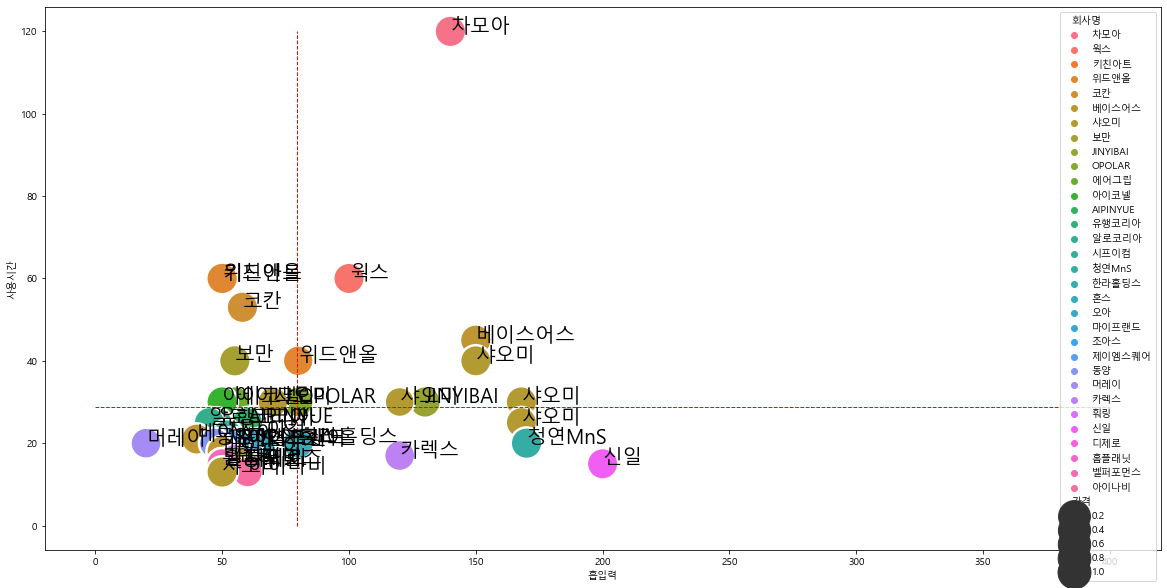

In [343]:
# suction_max_value = chart_data_selected['흡입력'].max()
suction_car_value = car_list['흡입력'].mean()
# use_time_max_value = chart_data_selected['사용시간'].max()
use_time_car_value = car_list['사용시간'].mean()

plt.figure(figsize = (20, 10))
sns.scatterplot(x = '흡입력', y = '사용시간',
               size = '가격', hue = car_list['회사명'],
               data = car_list,
               sizes = (1000, 900))
plt.hlines(use_time_car_value, 0, 400, color='red', 
           linestyle='dashed', linewidth=1)
plt.vlines(suction_car_value, 0, 120, color='red', 
           linestyle='dashed', linewidth=1)

for index, row in car_list.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['회사명'].split(' ')[0]
    plt.text(x, y, s, size=20)

plt.show()

In [339]:
new_list = car_list[:6]
new_list

,카테고리,회사명,제품,가격,사용시간,흡입력
35,차량용청소기,차모아,휴대용 에어건 파워 청소기,47660.0,120.0,140.0
15,차량용청소기,웍스,휴대용 차량용 충전 청소기 본체 WX030.9,193000.0,60.0,100.0
21,차량용청소기,키친아트,렉스 차량용 진공청소기 PK901,59880.0,60.0,50.0
22,차량용청소기,위드앤올,휴대용 무선 에어건 WNA-AG06,21290.0,60.0,50.0
23,차량용청소기,코칸,차량용 무선 진공 핸디 청소기 CHC-UY01,33660.0,53.0,58.0
1,차량용청소기,베이스어스,차량용 청소기 A3 (해외구매),73950.0,45.0,150.0


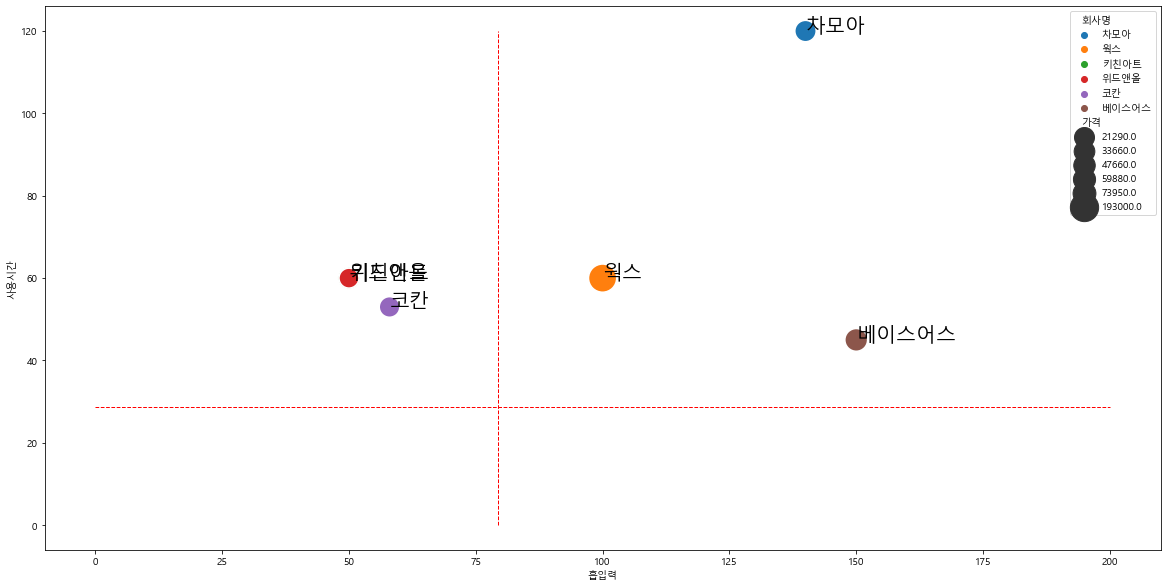

In [354]:
plt.figure(figsize = (20, 10))
sns.scatterplot(x = '흡입력', y = '사용시간',
               size = '가격', hue = new_list['회사명'],
               data = new_list,
               sizes = (400, 800))

plt.hlines(use_time_car_value, 0, 200, color='red', 
           linestyle='dashed', linewidth=1)
plt.vlines(suction_car_value, 0, 120, color='red', 
           linestyle='dashed', linewidth=1)

for index, row in new_list.iterrows():
    x = row['흡입력']
    y = row['사용시간']
    s = row['회사명'].split(' ')[0]
    plt.text(x, y, s, size=20)

plt.show()